# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")
df = pd.read_csv("data_clustering.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print(df.head())

   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.007207              680                1        36        0   
1           0.195940             1178                1        15        0   
2           0.065680             1262                1        23        2   
3           0.096016              818                1        33        2   
4           0.047888              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4     0.000000                   3             0.558621            0.0   

   AccountBalance  PreviousTransactionDate  cluster_labels  Target  
0        0.336832      

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

df_processed = df.copy()
le = LabelEncoder()
for column in df_processed.select_dtypes(include=['object']).columns:
    df_processed[column] = le.fit_transform(df_processed[column])

# Daftar LENGKAP fitur perilaku yang harus DIKELUARKAN
behavioral_features = ['TransactionAmount','TransactionDate','TransactionType','TransactionDuration','LoginAttempts','AccountBalance','PreviousTransactionDate'
]

leakage_and_target_features = ['Target', 'cluster_labels']

# Fitur Prediktor (X) adalah semua kolom KECUALI daftar di atas
predictor_features = [
    col for col in df_processed.columns
    if col not in behavioral_features and col not in leakage_and_target_features
]

print("--- Fitur yang Digunakan untuk Prediksi (X) ---")
print(predictor_features)
print("\n" + "="*50 + "\n")

X = df_processed[predictor_features]
y = df_processed['Target']

# Lsplitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




--- Fitur yang Digunakan untuk Prediksi (X) ---
['Location', 'Channel', 'CustomerAge', 'CustomerOccupation']




# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [5]:
# Buatlah model klasifikasi menggunakan Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

print("Model Decision Tree berhasil dilatih.")

Model Decision Tree berhasil dilatih.


In [6]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(decision_tree_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [7]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


--- Evaluasi Model: Decision Tree Classifier ---
Akurasi Model: 0.26666666666666666

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       121
           1       0.28      0.26      0.27       118
           2       0.29      0.30      0.30       122
           3       0.21      0.19      0.20       119

    accuracy                           0.27       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.27      0.27      0.27       480



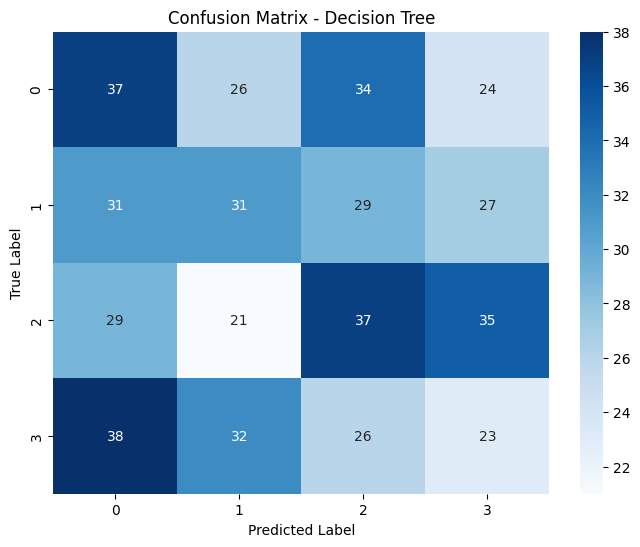



--- Evaluasi Model: Random Forest Classifier ---
Akurasi Model: 0.2625

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.27      0.30      0.28       121
           1       0.22      0.20      0.21       118
           2       0.24      0.25      0.25       122
           3       0.33      0.29      0.31       119

    accuracy                           0.26       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.26      0.26      0.26       480



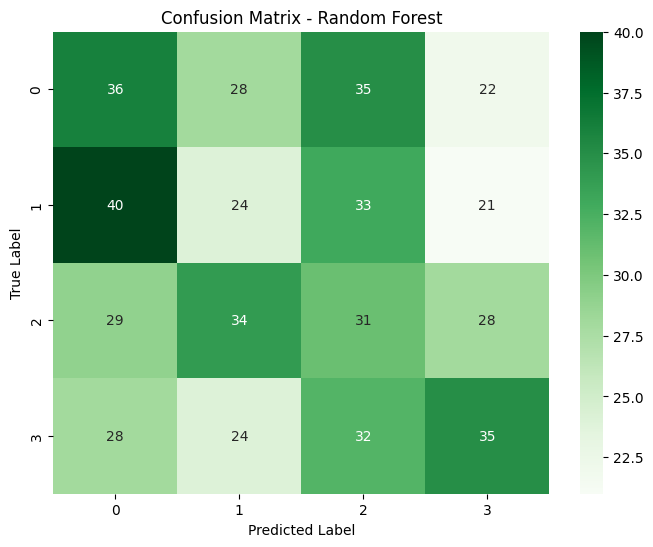

In [8]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
print("--- Evaluasi Model: Decision Tree Classifier ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred_dt)}")
print(f"\nLaporan Klasifikasi:\n{classification_report(y_test, y_pred_dt)}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\n" + "="*50 + "\n")


print("--- Evaluasi Model: Random Forest Classifier ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred_rf)}")
print(f"\nLaporan Klasifikasi:\n{classification_report(y_test, y_pred_rf)}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
joblib.dump(rf_model, 'explore_randomforest_classification.h5')

['explore_randomforest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [10]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
# Hyperparameter Tuning untuk Model Decision Tree

In [11]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Model terbaik hasil tuning

In [12]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(__, 'tuning_classification.h5')

End of Code